In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
# 1936 1660 94 26 1636 1604 98 36 1850 1536 78 24 

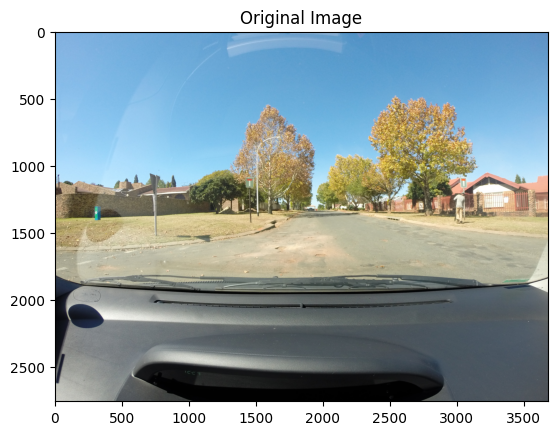

In [3]:
# Load the image
file_path = 'road_test_1.JPG'
image = cv2.imread(file_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title('Original Image')
plt.show()

In [9]:
src_points_trapezoid = np.float32([
    [1700, 1800], # Bottom left
    [3200, 1800], # Bottom right
    [1800, 1400], # Top left
    [2400, 1400] # Top right
])

# Define destination points for the trapezoid transformation, we'll map the points to a rectangle
dst_points_trapezoid = np.float32([
    [1000, 2000], # Bottom left
    [3000, 2000], # Bottom right
    [1000, 500], # Top left
    [3000, 500] # Top right
])

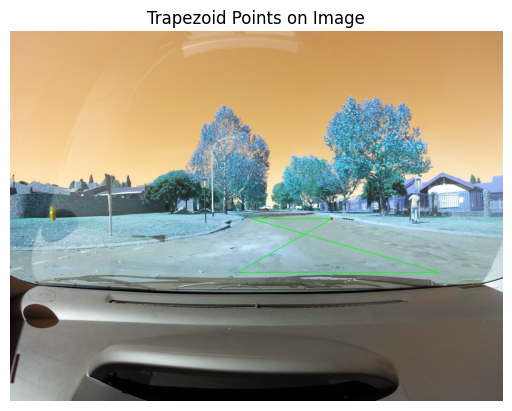

In [11]:
# Draw circles on the source points
for x, y in src_points_trapezoid:
    image2_trapezoid_points = cv2.circle(image.copy(), (int(x), int(y)), 10, (255, 0, 0), -1)

# Connect the points with lines to form the trapezoid
pts = src_points_trapezoid.reshape((-1, 1, 2)).astype(np.int32)
image2_trapezoid_lines = cv2.polylines(image2_trapezoid_points.copy(), [pts], True, (0, 255, 0), 3)

# Display the image with the points and lines
plt.imshow(image2_trapezoid_lines)
plt.title('Trapezoid Points on Image')
plt.axis('off')
plt.show()

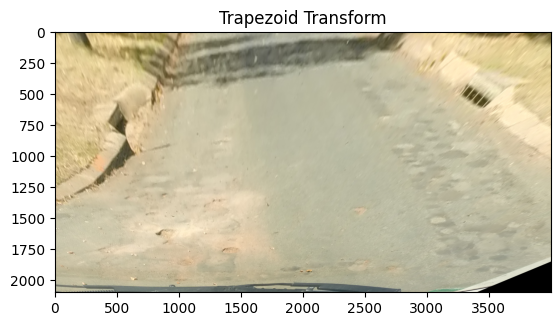

In [13]:
# Compute the perspective transform matrix and apply it
M_trapezoid = cv2.getPerspectiveTransform(src_points_trapezoid, dst_points_trapezoid)
warped_trapezoid = cv2.warpPerspective(image, M_trapezoid, (4000, 2100))

# Convert the warped image to RGB to display
warped_trapezoid_rgb = cv2.cvtColor(warped_trapezoid, cv2.COLOR_BGR2RGB)

# Show the result
plt.imshow(warped_trapezoid_rgb)
plt.title('Trapezoid Transform')
plt.show()

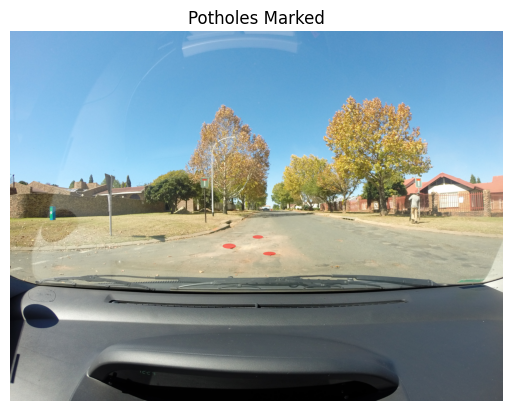

In [17]:
# Load the image again in case it was modified
image_potholes_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the pothole data with (x, y, width, height)
potholes_data = [
    (1936, 1660, 94, 26),
    (1636, 1604, 98, 36),
    (1850, 1536, 78, 24)
]

# Function to draw a translucent oval
def draw_translucent_oval(img, center, axes, color, thickness):
    overlay = img.copy()
    cv2.ellipse(overlay, center, axes, 0, 0, 360, color, thickness)
    alpha = 0.5
    cv2.addWeighted(overlay, alpha, img, 1 - alpha, 0, img)

for x, y, w, h in potholes_data:
    center = (x, y)
    axes = (w // 2, h // 2)
    draw_translucent_oval(image_potholes_rgb, center, axes, (255, 0, 0), -1)

# Show the result
plt.imshow(image_potholes_rgb)
plt.title('Potholes Marked')
plt.axis('off')  
plt.show()
